In [1]:
import bigbang.ietfattendance as ia
import bigbang.process as process
import pandas as pd
import matplotlib.pyplot as plt

import Levenshtein

Start by getting the attendence information for IETF.

In [2]:
attendance106 = ia.attendance_tables(106)

What organizations are best represented?

In [3]:
attendance106.groupby('Organization').count()['First Name'].sort_values(ascending=False)[:30]

Organization
                                 283
Google                            33
Cisco                             30
Nokia                             27
Cisco Systems                     27
Juniper Networks                  26
Ericsson                          18
Huawei                            18
Apple                             13
Internet Society                  13
Microsoft                         12
Facebook                          12
ICANN                             11
Huawei Technologies               10
NIST                               9
Akamai Technologies                9
RIPE NCC                           9
Futurewei                          8
NTT                                7
UPSA                               7
Verisign                           7
AMS                                7
ETRI                               7
MISA                               7
Mozilla                            7
Fastly                             6
Tsinghua University      

Even in this short list, there are repeat names. We need to apply entity resolution.

In [4]:
attendance106['Organization'].dropna().unique().shape

(776,)

This is too many names! It will overwhelm the entity resolver. Let's use a subset of the most relevant entities.

In [19]:
N = 250
topN = attendance106.groupby('Organization').count()['First Name'].sort_values(ascending=False)[:N]

distance_matrix = process.matricize(topN.index,
                                    process.containment_distance) \
                         .replace(to_replace=float('inf'), value= 100)

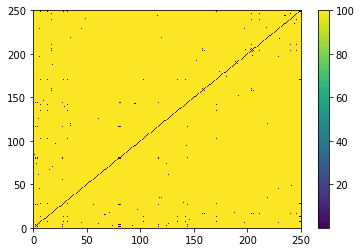

In [20]:
plt.pcolor(distance_matrix)
plt.colorbar()

In [21]:
ents = process.resolve_entities(topN, containment_distance, threshold=.25)

replacements = {}
for r in [{name: ent for name in ents[ent]} for ent in ents]:
    replacements.update(r)

In [22]:
attendance106.replace(to_replace=replacements)

,,Last Name,First Name,Organization,ISO 3166 Code,On-Site
0,NaN,NaN,NaN,NaN,NaN,Yes
1,NaN,NaN,NaN,NaN,NaN,Yes
2,1,Afanasiev,Dmitry,Yandex,RU,Yes
3,2,Aboba,Bernard,Microsoft,US,Yes
4,3,ackermann,michael,,US,Yes
5,4,Adair,Paul,Infoblox,US,Yes
6,5,Adjih,Cedric,Inria,FR,Yes
7,6,Aelmans,Melchior,Juniper Networks,NL,Yes
8,7,Agarwal,Sonal,Cisco,US,Yes
9,8,Aharen,Yoshitaka,"Japan Registry Services Co., Ltd.",JP,Yes
